# **Anomaly Detection using Twitter Approach**
Implementacao em Python da library em R de detecção de anomalias: AnomalyDetection.





## Metodologia
A biblioteca busca detectar anomalias **globais** e **locais**. Ele entende tendências estruturais como, por exemplo, crescimento orgânico das métricas. O Twitter chama o algoritmo de **Seasonal Hybrid ESD (S-H-ESD)**

### Casos em que detecta anomalia

1.   Crescimento mais cedo nas métricas sazonais.
2.   Ruídos não usuais ou mais ruídos do que o normal.
3.   Breakdown
4.   Crescimento repentino.
5.   Picos
6.   Alta atividade não usual.

### Casos em que não detecta

1. Crescimento linear.
2. Crescimento lineas sazonal.
3. Flat signal.
4. Ausência de ruído.
5. Crescimento exponencial.
6. Anomalia sazonal negativa.

## Introdução Teórica



## Documentação

*   Python: https://github.com/Marcnuth/AnomalyDetection
*   R: https://github.com/twitter/AnomalyDetection
* Parâmetros da função detect_ts(): https://rdrr.io/github/twitter/AnomalyDetection/man/AnomalyDetectionTs.html


## **Libraries**


* **Rpy2** serve para facilitar o uso de R por programadores Python
* **PyDrive** é a library da google-api-python-client que simplifica tarefas comuns da API do Google Drive



## Referências


*   **Importação módulos Python no Colab**: http://www.pingshiuanchua.com/blog/post/importing-your-own-python-module-or-python-file-in-colaboratory
* **Paper Twitter**: https://arxiv.org/pdf/1704.07706.pdf
*   **Github**: https://github.com/nicolasmiller/pyculiarity/blob/master/pyculiarity/detect_ts.py
* **Exemplos Visuais**: https://anomaly.io/anomaly-detection-twitter-r/



# Code 

## Setup




### Instalação de libraries

* **PyDrive**: conexão Google Drive API
* **Nose**: para teste unitário
* **Matplotlib**: plotting library
* **Numpy**: scientific computing
* **Seaborn**: visualização de dados estatisticos

In [0]:
# Interface de uso do R em Python
# https://stackoverflow.com/questions/51458445/can-you-use-rmagic-rpy2-in-google-colaboratory
!apt-get update
!apt-get install r-base
!pip install rpy2==2.8.6

!pip install -U -q PyDrive
!pip install nose
!pip install matplotlib
!pip install numpy
!pip install seaborn

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [269 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [578 kB]
Fetched 1,093 kB in 2s (620 kB/s)
Reading package lists... Done
Reading package list

## Autenticação Google Drive

Importa todas as funções e variáveis do modulo **os**. Demais são imports específicos dos respectivos módulos.


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autentica e cria um cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Importação modulos Python no Colab

IDs dos módulos: 
1. Clicar com o botão direito no arquivo do Drive
2. Get shareable link
3. ID no final do link



In [0]:
# Linka o Colab Notebook aos Modulos
date_utils = drive.CreateFile({'id':'148ceh7X49aYj7qwiVElpp_bedtR1Gh8a'})
detect_anoms = drive.CreateFile({'id':'1t6WGSA0fi8SDqjUPmOh08thMXn78sJ3W'})
detect_ts = drive.CreateFile({'id':'1iV7uVjNJgujiI30eSgb_gyCsKp_Svn7Q'})
detect_vec = drive.CreateFile({'id':'1MMHYXxcjecC6e7fLR5DBi09LIEdjjMQF'})
r_stl = drive.CreateFile({'id':'1avJS9ZwM0kTmg3eniEx0c_9nHiUqRHL2'})

In [0]:
# Importa modulos Python no Colab
date_utils.GetContentFile('date_utils.py')
detect_anoms.GetContentFile('detect_anoms.py')
detect_ts.GetContentFile('detect_ts.py')
detect_vec.GetContentFile('detect_vec.py')
r_stl.GetContentFile('r_stl.py')


Importa os módulos que foram carregados pelo Drive acima.

In [0]:
from detect_vec import detect_vec
from detect_ts import detect_ts
from pandas.core import datetools

import pandas as pd
from nose.tools import eq_
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from __future__ import division

## Leitura arquivo de Entrada

In [0]:
# Arquivo de entrada
data = drive.CreateFile({'id': '185-pwG_6iSurv0aU2z9_H91MUnfFfOq_'})
data.GetContentFile('raw_data.csv')


## Tratamento de Dados

Cria dataframe com os dados do arquivo .csv. 
Em seguida, chama a função **detect_ts()**: Técnica que detecta anomalias em séries temporais univariadas sazonais. 

* **Input**: é uma série com os pares <timestamp, value>.
* **Output**: dicionario de 2 chaves. A segunda chave (com o plot) não foi implementada no módulo.

### Parâmetros:
* **max_anoms**: número máximo de anomalias que será detectado (porcentagem dos dados)
* **direction**: direcionalidade das anomalias a serem detectadas (pos, neg ou both). Por exemplo, uma tendência constante de crescimento que poderia ser considerada estável, pode ter uma mudança na inclinação que pode ser sinalizada como anomalia.
* **e_value**: adiciona uma coluna adicional com a saída das anomalias com os valores esperados.
* **plot**: não está implementado.
* **threshold**: exibe somente anomalias positivas acima do threshold especificado. Opções: 'None' | 'med_max' | 'p95' | 'p99'.


In [0]:
df = pd.read_csv('raw_data.csv', usecols=['timestamp', 'count'])

# Resultados em um dicionario de 2 chaves. A segunda chave (plot) nao foi implementada.
results = detect_ts(df,
                    max_anoms=0.02,
                    direction='both', e_value=True, plot=True)
                    #direction='both', only_last='day', e_value=True, plot=True)
del(results["plot"]) # remove a segunda chave (plot) que não está implementada

Do dataframe com a base, converte o timestamp para datetime e seta o índice do dataframe como sendo o timestamp. Fiz isso para conseguir plotar no eixo x.

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # converte coluna timestamp para datetime
df.index = df['timestamp'] # seta df['timestamp'] como indice
del df['timestamp'] # deleta a coluna timestamp


O dicionário **results** contém a chave **anoms**, com o valor sendo a tabela de anomalias com timestamp sendo o índice, o valor da anomalia, o expected_value e timestamp. Cria o dataframe **df_anom** com os dados do valor da primeira chave do dicionário.

In [0]:
type(results)
# results.keys()
# results.values()
# for key in results:
#    value = results[key]
#    print key, "=>", value
    
anomalias = results['anoms']
anomalias.dtypes
df_anom = pd.DataFrame(data = anomalias['anoms'])
df_anom

,anoms
timestamp,
1980-09-25 16:05:00,21.3510
1980-09-29 06:40:00,193.1036
1980-09-29 21:44:00,148.1740
1980-09-30 17:46:00,52.7478
1980-09-30 17:48:00,49.6582
1980-09-30 17:50:00,35.6067
1980-09-30 17:51:00,32.5045
1980-09-30 17:52:00,30.0555
1980-09-30 17:53:00,31.2614


## Plotar Média Diária e Total Diário

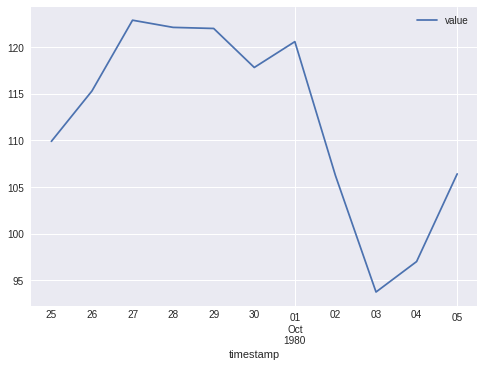

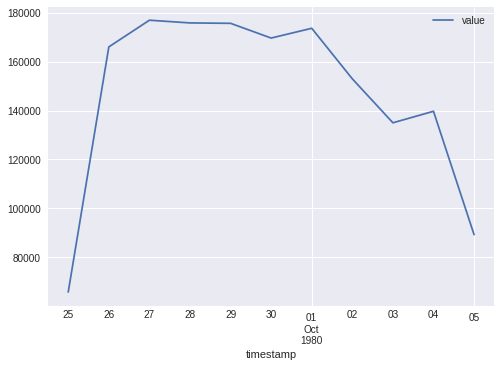

In [0]:
df.resample('D').mean() # Media diaria
df.resample('D').mean().plot()
df.resample('D').sum() # Total diario
df.resample('D').sum().plot() # Plot of the total per day

## Plot da Série Temporal e Anomalias

Cálcula o share de anomalias obtidas pelo detect_ts(). Para plotar duas fontes de dados, usamos o subplots(). O primeiro plot configura o eixo x como sendo ax (x=ax), bem como o segundo plot (ax=ax).
Style 'bo': b - blue, o - circle marker.

0.91%


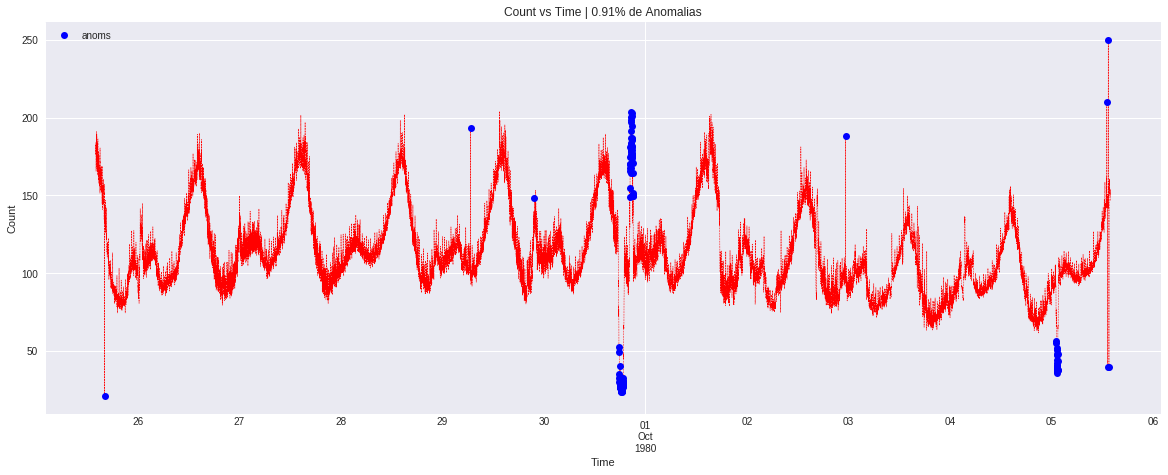

In [0]:
# Calculo share de anomalias
base_count = df.shape[0] # count() nao retorna os NAN
anom_count = df_anom.shape[0]
anom_share = anom_count / base_count
print "{0:.2f}%".format(float(anom_share) * 100) # share de anomalias

# Plot
# Referencia: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html
fig, ax = plt.subplots()
#ax2 = ax.twiny()
df.dtypes
df['value'].plot(color = 'red', linestyle='dashed', linewidth = 0.5, x=ax)
df_anom.plot(style='bo', ax=ax)


#ax2.xaxis.get_major_formatter().set_useOffset(False)
#ax2.set_xlim(df.index.min(),df.index.max())

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count vs Time | '+ str("{0:.2f}%".format(float(anom_share) * 100)) + ' de Anomalias')
plt.subplots_adjust(bottom=0.2)

fig = plt.gcf()
fig.set_size_inches(20, 8)

In [0]:
df_anom.to_csv('anoms.csv', index=True)
file = drive.CreateFile({'parents':[{u'id': '16KdzoR9J-4JPz_E5UQRztjps8ucitB_I'}]})
file.SetContentFile('anoms.csv')
file.Upload()